In [35]:
import sys
!{sys.executable} -m pip install scipy matplotlib numpy

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [36]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.pyplot import figure

In [37]:
# Load all data

with open("xvalues.json") as f:
    xvalues = json.load(f)

with open("yvalues.json") as f:
    yvalues = json.load(f)

with open("zvalues.json") as f:
    zvalues = json.load(f)

TX = np.array([(e["t"], e["v"]) for e in xvalues[340:600]])
TY = np.array([(e["t"], e["v"]) for e in yvalues[340:600]])
TZ = np.array([(e["t"], e["v"]) for e in zvalues[340:600]])

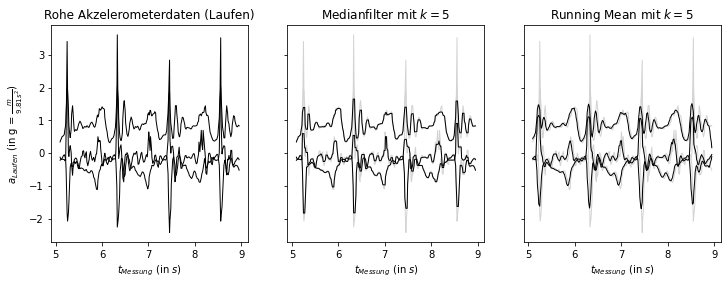

In [38]:
linewidth = 1

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(12, 4)


axs[0].plot([e[0] for e in TX], [e[1] for e in TX], label='x', linewidth=linewidth, color="black")
axs[0].plot([e[0] for e in TY], [e[1] for e in TY], label='y', linewidth=linewidth, color="black")
axs[0].plot([e[0] for e in TZ], [e[1] for e in TZ], label='z', linewidth=linewidth, color="black")
axs[0].set_title("Rohe Akzelerometerdaten (Laufen)")

def medfilt(x, k):
    """Apply a length-k median filter to a 1D array x.
    Boundaries are extended by repeating endpoints.
    """
    assert k % 2 == 1, "Median filter length must be odd."
    assert x.ndim == 1, "Input must be one-dimensional."
    k2 = (k - 1) // 2
    y = np.zeros((len(x), k), dtype=x.dtype)
    y[:, k2] = x
    for i in range(k2):
        j = k2 - i
        y[j:, i] = x[:-j]
        y[:j, i] = x[0]
        y[:-j, -(i+1)] = x[j:]
        y[-j:, -(i+1)] = x[-1]
    return np.median(y, axis=1)

axs[1].plot([e[0] for e in TX], [e[1] for e in TX], label='x', linewidth=linewidth, color="lightgray")
axs[1].plot([e[0] for e in TY], [e[1] for e in TY], label='y', linewidth=linewidth, color="lightgray")
axs[1].plot([e[0] for e in TZ], [e[1] for e in TZ], label='z', linewidth=linewidth, color="lightgray")
axs[1].plot([e[0] for e in TX], medfilt(np.array([e[1] for e in TX]), 5), label='x', linewidth=linewidth, color="black")
axs[1].plot([e[0] for e in TY], medfilt(np.array([e[1] for e in TY]), 5), label='y', linewidth=linewidth, color="black")
axs[1].plot([e[0] for e in TZ], medfilt(np.array([e[1] for e in TZ]), 5), label='z', linewidth=linewidth, color="black")
axs[1].set_title(r'Medianfilter mit $k = 5$')

def running_mean(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

axs[2].plot([e[0] for e in TX], [e[1] for e in TX], label='x', linewidth=linewidth, color="lightgray")
axs[2].plot([e[0] for e in TY], [e[1] for e in TY], label='y', linewidth=linewidth, color="lightgray")
axs[2].plot([e[0] for e in TZ], [e[1] for e in TZ], label='z', linewidth=linewidth, color="lightgray")
axs[2].plot([e[0] for e in TX], running_mean(np.array([e[1] for e in TX]), 5), label='x', linewidth=linewidth, color="black")
axs[2].plot([e[0] for e in TY], running_mean(np.array([e[1] for e in TY]), 5), label='y', linewidth=linewidth, color="black")
axs[2].plot([e[0] for e in TZ], running_mean(np.array([e[1] for e in TZ]), 5), label='z', linewidth=linewidth, color="black")
axs[2].set_title(r'Running Mean mit $k = 5$')

for ax in axs.flat:
    ax.set(xlabel=r'$t_{Messung}$ (in $s$)', ylabel=r'$a_{Laufen}$ (in g = $\frac{m}{9.81 s^2}$)')

for ax in axs.flat:
    ax.label_outer()

plt.savefig('glaettingsfilter.pdf', dpi=1200, bbox_inches='tight')
plt.show()

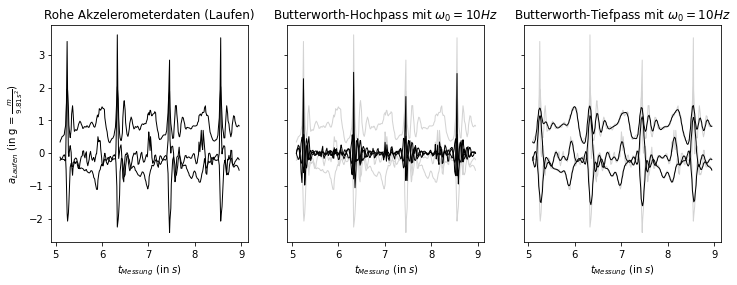

In [39]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
fig.set_size_inches(12, 4)

axs[0].plot([e[0] for e in TX], [e[1] for e in TX], label='x', linewidth=linewidth, color="black")
axs[0].plot([e[0] for e in TY], [e[1] for e in TY], label='y', linewidth=linewidth, color="black")
axs[0].plot([e[0] for e in TZ], [e[1] for e in TZ], label='z', linewidth=linewidth, color="black")
axs[0].set_title("Rohe Akzelerometerdaten (Laufen)")

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

axs[1].plot([e[0] for e in TX], [e[1] for e in TX], label='x', linewidth=linewidth, color="lightgray")
axs[1].plot([e[0] for e in TY], [e[1] for e in TY], label='y', linewidth=linewidth, color="lightgray")
axs[1].plot([e[0] for e in TZ], [e[1] for e in TZ], label='z', linewidth=linewidth, color="lightgray")
axs[1].plot([e[0] for e in TX], butter_highpass_filter(np.array([e[1] for e in TX]), 10, 100), label='x', linewidth=linewidth, color="black")
axs[1].plot([e[0] for e in TY], butter_highpass_filter(np.array([e[1] for e in TY]), 10, 100), label='y', linewidth=linewidth, color="black")
axs[1].plot([e[0] for e in TZ], butter_highpass_filter(np.array([e[1] for e in TZ]), 10, 100), label='z', linewidth=linewidth, color="black")
axs[1].set_title(r'Butterworth-Hochpass mit $\omega_{0} = 10Hz$')

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

axs[2].plot([e[0] for e in TX], [e[1] for e in TX], label='x', linewidth=linewidth, color="lightgray")
axs[2].plot([e[0] for e in TY], [e[1] for e in TY], label='y', linewidth=linewidth, color="lightgray")
axs[2].plot([e[0] for e in TZ], [e[1] for e in TZ], label='z', linewidth=linewidth, color="lightgray")
axs[2].plot([e[0] for e in TX], butter_lowpass_filter(np.array([e[1] for e in TX]), 10, 100), label='x', linewidth=linewidth, color="black")
axs[2].plot([e[0] for e in TY], butter_lowpass_filter(np.array([e[1] for e in TY]), 10, 100), label='y', linewidth=linewidth, color="black")
axs[2].plot([e[0] for e in TZ], butter_lowpass_filter(np.array([e[1] for e in TZ]), 10, 100), label='z', linewidth=linewidth, color="black")
axs[2].set_title(r'Butterworth-Tiefpass mit $\omega_{0} = 10Hz$')

for ax in axs.flat:
    ax.set(xlabel=r'$t_{Messung}$ (in $s$)', ylabel=r'$a_{Laufen}$ (in g = $\frac{m}{9.81 s^2}$)')

for ax in axs.flat:
    ax.label_outer()

plt.savefig('frequenzpassfilter.pdf', dpi=1200, bbox_inches='tight')
plt.show()